In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BankChurnersTrain.csv")

In [3]:
df.head()

,CCNum,Trans_date_Time,Attrition_Flag,Surname,Age,Gender,CreditScore,Geography,Tenure,Education_Level,...,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
0,768805383,01/01/2019 00:00,Existing Customer,Hargrave,45,M,619,France,2,High School,...,12691.0,1144,42,0.00,1,1,1,101348.88,0,1
1,818770008,01/01/2019 00:00,Existing Customer,Hill,49,F,608,Spain,1,Graduate,...,8256.0,1291,33,83807.86,1,0,1,112542.58,0,0
2,713982108,01/01/2019 00:00,Existing Customer,Onio,51,M,502,France,8,Graduate,...,3418.0,1887,20,159660.80,3,1,0,113931.57,0,1
3,769911858,01/01/2019 00:01,Existing Customer,Boni,40,F,699,France,1,High School,...,3313.0,1171,20,0.00,2,0,0,93826.63,0,0
4,709106358,01/01/2019 00:03,Existing Customer,Mitchell,40,M,850,Spain,2,Uneducated,...,4716.0,816,28,125510.82,1,1,1,79084.10,0,0


## Drop irrelevant columns

In [4]:
df = df.drop(["CCNum", "Surname"], axis = 1)

In [5]:
df.head()

,Trans_date_Time,Attrition_Flag,Age,Gender,CreditScore,Geography,Tenure,Education_Level,Income_Category,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_fraud,Exited
0,01/01/2019 00:00,Existing Customer,45,M,619,France,2,High School,$60K - $80K,Blue,12691.0,1144,42,0.00,1,1,1,101348.88,0,1
1,01/01/2019 00:00,Existing Customer,49,F,608,Spain,1,Graduate,Less than $40K,Blue,8256.0,1291,33,83807.86,1,0,1,112542.58,0,0
2,01/01/2019 00:00,Existing Customer,51,M,502,France,8,Graduate,$80K - $120K,Blue,3418.0,1887,20,159660.80,3,1,0,113931.57,0,1
3,01/01/2019 00:01,Existing Customer,40,F,699,France,1,High School,Less than $40K,Blue,3313.0,1171,20,0.00,2,0,0,93826.63,0,0
4,01/01/2019 00:03,Existing Customer,40,M,850,Spain,2,Uneducated,$60K - $80K,Blue,4716.0,816,28,125510.82,1,1,1,79084.10,0,0


In [14]:
df.shape

(10000, 20)

## Visualising Exit Rate

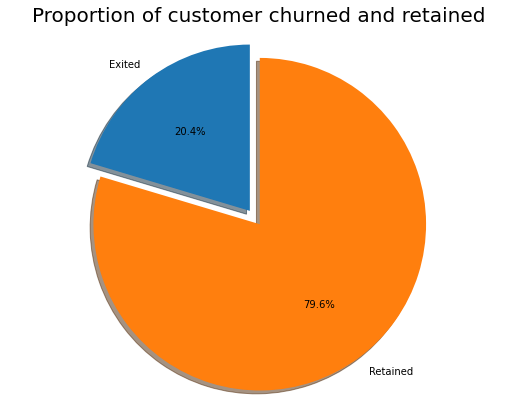

In [10]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Approximately 20% of customers have exited the bank - hence data set is imbalanced

Text(0.5, 1.0, 'Countplot-Geography Column')

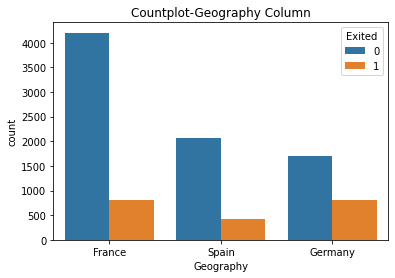

In [11]:
sns.countplot(x='Geography', hue = 'Exited',data = df).set_title('Countplot-Geography Column')

In [12]:
print (pd.crosstab(df["Geography"],df["Exited"]))

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


French customers account for 52.15% of customers - 16.1 % of french customers have left
German customers account for 25% of customers - 32% of german customers have left
Spainish customers account for 24.77% of customers - 16.6% of spanish customers have left

Text(0.5, 1.0, 'Countplot-Gender Column')

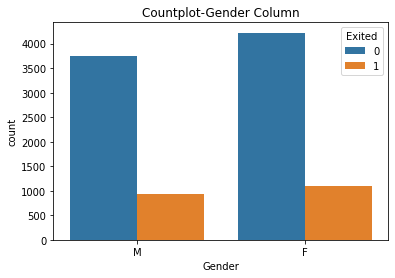

In [17]:
sns.countplot(x='Gender', hue = 'Exited',data = df).set_title('Countplot-Gender Column')


In [18]:
print (pd.crosstab(df["Gender"],df["Exited"]))

Exited     0     1
Gender            
F       4223  1093
M       3740   944


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

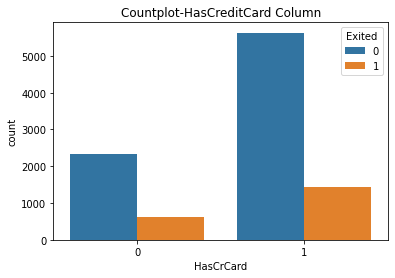

In [19]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


In [20]:
print (pd.crosstab(df["HasCrCard"],df["Exited"]))

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

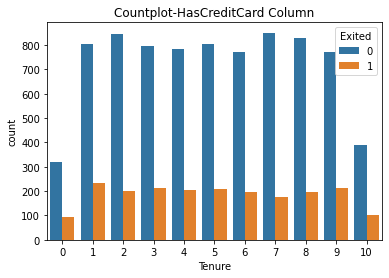

In [21]:
sns.countplot(x='Tenure', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


In [22]:
print (pd.crosstab(df["Tenure"],df["Exited"]))

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

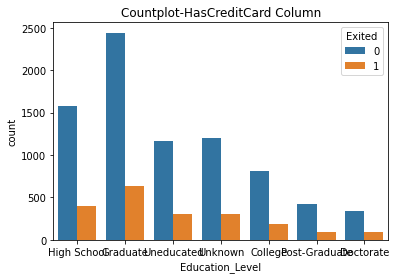

In [26]:
sns.countplot(x='Education_Level', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

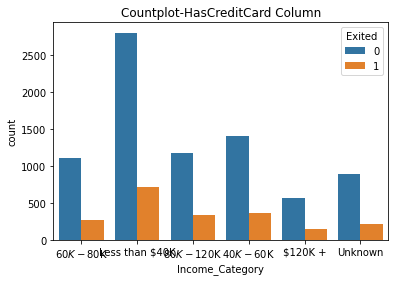

In [27]:
sns.countplot(x='Income_Category', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')


<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

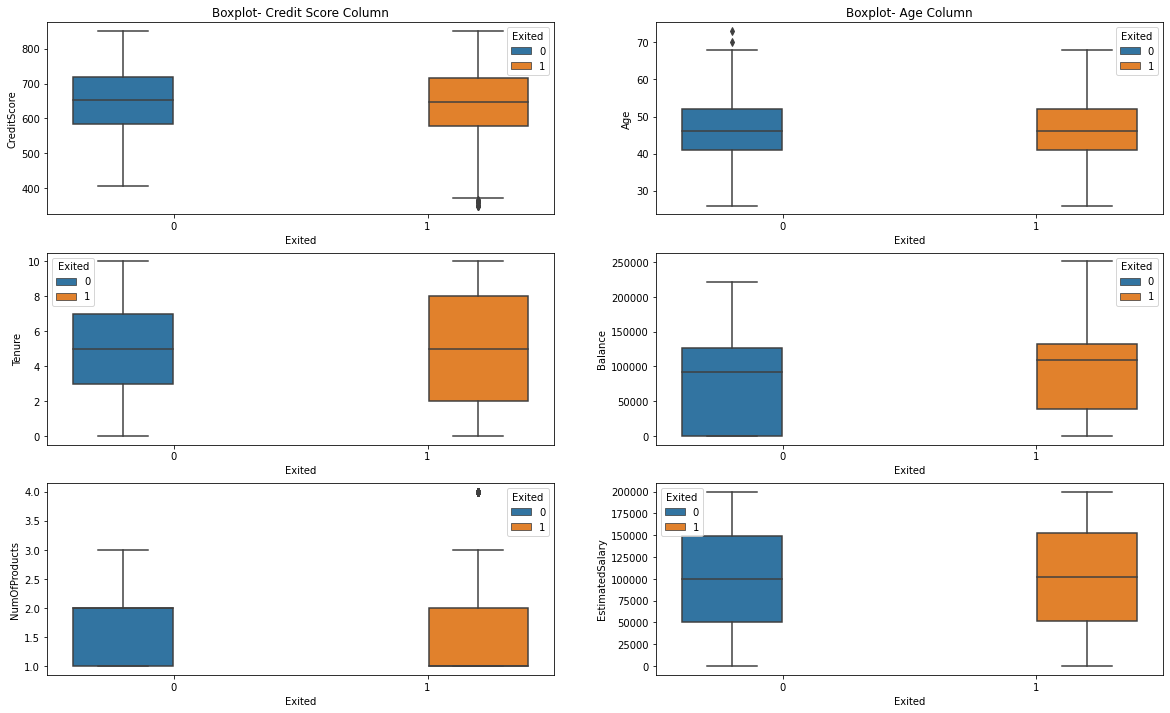

In [28]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0]).set_title('Boxplot- Credit Score Column')
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1]).set_title('Boxplot- Age Column')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We can seen customers who churn have a slightly higher balance than those who don't 

In [25]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64